<a href="https://colab.research.google.com/github/VijaySingh93/Deep-Learning-Projects/blob/master/DocumentClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DocCluster.zip to DocCluster.zip
User uploaded file "DocCluster.zip" with length 37366414 bytes


In [0]:
!unzip DocCluster.zip
!ls
# !rm -r 'DocCluster.zip'

Archive:  DocCluster.zip
   creating: DocCluster/Artificial_Intelligence/
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence1_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence10_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence2_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence3_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence4_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence5_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence6_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence7_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence8_pdf.pdf  
  inflating: DocCluster/Artificial_Intelligence/Artificial_Intelligence9_pdf.pdf  
   creating: DocCluster/Business_and_Management/
  inflating: DocCluster/Business_and_Managemen

In [0]:
!pip install docxpy

  Created wheel for docxpy: filename=docxpy-0.8.5-cp36-none-any.whl size=4981 sha256=baadc69bcdf0eec63ed3a4502f631787f06cd5a7ae091a1a0bab79c9b043766c
  Stored in directory: /root/.cache/pip/wheels/31/a4/3b/b599666ccef58cc564d41f83d2b4c92657cde48e4cea4c682a
Successfully built docxpy


In [0]:
import os
import docxpy
import numpy as np
import warnings
import re
import pandas as pd
warnings.simplefilter('ignore')

In [0]:
!pip install pdfminer-six 

     |████████████████████████████████| 5.6MB 8.1MB/s 
     |████████████████████████████████| 13.7MB 242kB/s 


In [0]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

class PdfConverter:

    def __init__(self, file_path):
        self.file_path = file_path
   
    #convert pdf file to a string which has space among words 
    def convert_pdf_to_txt(self):
        rsrcmgr = PDFResourceManager()
        retstr = StringIO()
        codec = 'utf-16'  # 'utf16','utf-8'
        laparams = LAParams()
        device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
        fp = open(self.file_path, 'rb')
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()
        for page in PDFPage.get_pages(fp, pagenos, 
                                      maxpages=maxpages, 
                                      password=password, 
                                      caching=caching, 
                                      check_extractable=True):
            interpreter.process_page(page)
        fp.close()
        device.close()
        str = retstr.getvalue()
        retstr.close()
        return str
      
    # convert pdf file text to string and save as a text_pdf.txt file
    def save_convert_pdf_to_txt(self):
        content = self.convert_pdf_to_txt()
        txt_pdf = open('text_pdf.txt', 'wb')
        txt_pdf.write(content.encode('utf-8'))
        txt_pdf.close()

In [0]:
def extract_text(directory):
    pdf_docs = []
    word_docs = []
    for dirname,_,filenames in os.walk(directory):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            pdf_text = ''
            word_text = ''
            if filename[-3:] == 'pdf':
                pdfConverter = PdfConverter(file_path=path)
                pdf_text = pdfConverter.convert_pdf_to_txt()
                pdf_text = pdf_text.strip('').replace('\n',' ')
                pdf_text = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', pdf_text)
                pdf_docs.append((pdf_text,path.split(os.sep)[1]))
            elif filename[-4:] == 'docx':
                doc = docxpy.DOCReader(path)
                doc.process()  # process file
                word_text = doc.data['document']
                word_text = word_text.strip("").replace('\n',' ').replace('\t','')
                word_docs.append((word_text,path.split(os.sep)[1]))
            else:
                #print('The file provided is neither pdf nor word doc; Skipping processing!')
                pass
    return (pdf_docs, word_docs)

In [0]:
directory = 'DocCluster'
pdf_docs, word_docs = extract_text(directory)

In [0]:
print(len(pdf_docs))
print(len(word_docs))

67
18


In [0]:
word_docs[0][0][:1500]

'  https://doi.org/10.1007/s10479-020-03602-y    S.I. : A RTIFICIAL I NTELLIGENCE IN OPERATIONS MANAGEMENT         Impact of artificial intelligence adoption on online returns policies    Guangyong Yang1 · Guojun Ji1 · Kim Hua Tan2    © The Author(s) 2020      Abstract  The shift to e-commerce has led to an astonishing increase in online sales for retailers. However, the number of returns made on online purchases is also increasing and have a profound impact on retailers’ operations and profit. Hence, retailers need to balance between minimizing and allowing product returns. This study examines an offline showroom versus an artificial intelligence (AI) online virtual-reality webroom and how the settings affect customers’ purchase and retailers’ return decisions. A case study is used to illustrate the AI application. Our results show that adopting artificial intelligence helps sellers to make better returns policies, maximize reselling returns, and reduce the risks of leftovers and shor

In [0]:
docs_df = pd.DataFrame(pdf_docs, columns=['Document', 'Class'])

In [0]:
docs_df = pd.concat([docs_df, pd.DataFrame(word_docs, columns=['Document', 'Class'])], ignore_index=True)

In [0]:
docs_df['Document'][0][0:5000]

'Information Systems Frontiers https://doi.org/10.1007/s10796-020-10013-8  The Search for Smartness in Working, Living and Organising: Beyond the ‘Technomagic’  Editorial for Special Issue of Information Systems Frontiers  Amany Elbanna 1 & Yogesh Dwivedi 2 & Deborah Bunker 3 & David Wastell 4  # Springer Science+Business Media, LLC, part of Springer Nature 2020  1 Introduction  The significant advancement in the fields of electronics and com- puter science has produced innovation in devices and systems. For example, the miniaturisation of electronic components and devices combined with the evolution of wireless distributed net- works have significantly enabled mobility and the connectivity of devices. Also, advances in sensor technologies have allowed ubiquitous objects to measure performance and transmit infor- mation regarding their functional state and their operating envi- ronment in a more reliable and low-cost way. These technologies enabled the development of mobile devices and

In [0]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers

     |████████████████████████████████| 1.0MB 8.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=ce9ed6c37eff3ed3fe3f35dfd4ee690214beff9846a82e7dd1bd6fa626e40766
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect
  Created wheel for language-detector: filename=language_detector-5.0.2-cp36-none-any.whl size=7053 sha256=dbc4ca44b234dee460dc23f5117f03c9a95775b3ec25ec9326d4b79cdfeed42e
  Stored in directory: /root/.cache/pip/wheels/7d/37/fa/2098a4aa6c0d94d6ddff0d3a79669e12bc4f7baca8a760b3db
Successfully built language-detector
     |████████████████████████████████| 2.6MB 8.9MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 645kB 12.1MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 3.8MB 27.2MB/s 
     |████████████████████████████████| 890kB 59.8MB/s 

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.preprocessing import Normalizer
from nltk.stem.porter import *

import datetime
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import nltk
from collections import Counter
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel

In [0]:
from collections import Counter
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel

def get_topic_words(token_lists, labels, k=None):
    """
    get top words within each topic from clustering results
    """
    if k is None:
        k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:20])), word_counts))

    return topics

def get_coherence(model, token_lists, measure='c_v'):
    """
    Get model coherence from gensim.models.coherencemodel
    :param model: Topic_Model object
    :param token_lists: token lists of docs
    :param topics: topics as top words
    :param measure: coherence metrics
    :return: coherence score
    """
    if model.method == 'LDA':
        cm = CoherenceModel(model=model.ldamodel, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    else:
        topics = get_topic_words(token_lists, model.cluster_model.labels_)
        cm = CoherenceModel(topics=topics, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    return cm.get_coherence()

def get_silhouette(model):
    """
    Get silhouette score from model
    :param model: Topic_Model object
    :return: silhouette score
    """
    if model.method == 'LDA':
        return
    lbs = model.cluster_model.labels_
    vec = model.vec[model.method]
    return silhouette_score(vec, lbs)

def plot_proj(embedding, lbs):
    """
    Plot UMAP embeddings
    :param embedding: UMAP (or other) embeddings
    :param lbs: labels
    """
    n = len(embedding)
    counter = Counter(lbs)
    for i in range(len(np.unique(lbs))):
        plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', alpha=0.5,
                 label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
    plt.legend(loc = 'best')
    plt.grid(color ='grey', linestyle='-',linewidth = 0.25)


def visualize(model):
    """
    Visualize the result for the topic model by 2D embedding (UMAP)
    :param model: Topic_Model object
    """
    if model.method == 'LDA':
        return
    reducer = umap.UMAP()
    print('Calculating UMAP projection ...')
    vec_umap = reducer.fit_transform(model.vec[model.method])
    print('Calculating UMAP projection. Done!')
    plot_proj(vec_umap, model.cluster_model.labels_)
    dr = '/contextual_topic_identification/docs/images/{}/{}'.format(model.method, model.id)
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig('/2D_vis')

def get_wordcloud(model, token_lists, topic):
    """
    Get word cloud of each topic from fitted model
    :param model: Topic_Model object
    :param sentences: preprocessed sentences from docs
    """
    if model.method == 'LDA':
        return
    print('Getting wordcloud for topic {} ...'.format(topic))
    lbs = model.cluster_model.labels_
    tokens = ' '.join([' '.join(_) for _ in np.array(token_lists)[lbs == topic]])

    wordcloud = WordCloud(width=800, height=560,
                          background_color='white', collocations=False,
                          min_font_size=10).generate(tokens)

    # plot the WordCloud image
    plt.figure(figsize=(8, 5.6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    dr = '/kaggle/working/{}/{}'.format(model.method, model.id)
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig('/Topic' + str(topic) + '_wordcloud')
    print('Getting wordcloud for topic {}. Done!'.format(topic))

In [0]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=f6d2293242155bcc079c3b1dd0053699fe56fbc36218ce6a1a9d694154a547c0
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [0]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import re
import nltk
from nltk.tokenize import word_tokenize
from language_detector import detect_language

import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
if sym_spell.word_count:
    pass
else:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)


###################################
#### sentence level preprocess ####
###################################

# lowercase + base filter
# some basic normalization
def f_base(s):
    """
    :param s: string to be processed
    :return: processed string: see comments in the source code for more info
    """
    # normalization 1: xxxThis is a --> xxx. This is a (missing delimiter)
    # s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s)  # before lower case
    # normalization 2: lower case
    s = s.lower()
    # # normalization 3: "&gt", "&lt"
    # s = re.sub(r'&gt|&lt', ' ', s)
    # # normalization 4: letter repetition (if more than 2)
    # s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # # normalization 5: non-word repetition (if more than 1)
    # s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # # normalization 6: string * as delimiter
    # s = re.sub(r'\*|\W\*|\*\W', '. ', s)
    # # normalization 7: stuff in parenthesis, assumed to be less informal
    # s = re.sub(r'\(.*?\)', '. ', s)
    # # normalization 8: xxx[?!]. -- > xxx.
    # s = re.sub(r'\W+?\.', '.', s)
    # # normalization 9: [.?!] --> [.?!] xxx
    # s = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', s)
    # # normalization 10: ' ing ', noise text
    # s = re.sub(r' ing ', ' ', s)
    # # normalization 11: noise text
    # s = re.sub(r'product received for free[.| ]', ' ', s)
    # # normalization 12: phrase repetition
    # s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)

    return s.strip()[0:10000]


# language detection
def f_lan(s):
    """
    :param s: string to be processed
    :return: boolean (s is English)
    """

    # some reviews are actually english but biased toward french
    return detect_language(s) in {'English', 'French','Spanish','Chinese'}


###############################
#### word level preprocess ####
###############################

# filtering out punctuations and numbers
def f_punct(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with punct and number filter out
    """
    return [word for word in w_list if word.isalpha()]


# selecting nouns
def f_noun(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with only nouns selected
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']


# typo correction
def f_typo(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    w_list_fixed = []
    for word in w_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
        if suggestions:
            w_list_fixed.append(suggestions[0].term)
        else:
            pass
            # do word segmentation, deprecated for inefficiency
            # w_seg = sym_spell.word_segmentation(phrase=word)
            # w_list_fixed.extend(w_seg.corrected_string.split())
    return w_list_fixed


# stemming if doing word-wise
p_stemmer = WordNetLemmatizer()


def f_stem(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with stemming
    """
    return [p_stemmer.lemmatize(word) for word in w_list]


# filtering out stop words
# create English stop words list

stop_words = (list(
    set(get_stop_words('en'))))





def f_stopw(w_list):
    """
    filtering out stop words
    """
    return [word for word in w_list if word not in stop_words]


def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw review texts
    :param rw: review to be processed
    :return: sentence level pre-processed review
    """
    s = f_base(rw)
    if not f_lan(s):
        return None
    return s


def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    # w_list = f_punct(w_list)
    # w_list = f_noun(w_list)
    # w_list = f_typo(w_list)
    w_list = f_stem(w_list)
    w_list = f_stopw(w_list)

    return w_list

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split



class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=64, activation='relu', epochs=200, batch_size=32):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=32,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
#from Autoencoder import *
#from preprocess import *
from datetime import datetime


def preprocess(docs, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(docs)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    #     samp = list(range(100))
    samp = np.random.choice(n_docs, samp_size)
    for i, idx in enumerate(samp):
        sentence = preprocess_sent(docs[idx])
        token_list = preprocess_word(sentence)
        if token_list:
            idx_in.append(idx)
            sentences.append(sentence)
            token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / len(samp) * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in


# define model object
class Topic_Model:
    def __init__(self, k=10, method='TFIDF'):
        """
        :param k: number of topics
        :param method: method chosen for the topic model
        """
        if method not in {'TFIDF', 'LDA', 'BERT', 'LDA_BERT'}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        #         self.stopwords = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = 15  # parameter for reletive importance of lda
        self.method = method
        self.AE = None
        self.id = method + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

    def vectorize(self, sentences, token_lists, method=None):
        """
        Get vecotr representations from selected methods
        """
        # Default method
        if method is None:
            method = self.method

        # turn tokenized documents into a id <-> term dictionary
        self.dictionary = corpora.Dictionary(token_lists)
        self.dictionary.filter_extremes(no_above=0.3)
        # convert tokenized documents into a document-term matrix
        self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'TFIDF':
            print('Getting vector representations for TF-IDF ...')
            tfidf = TfidfVectorizer()
            vec = tfidf.fit_transform(sentences)
            vec = Normalizer().fit_transform(vec)
            print('Getting vector representations for TF-IDF. Done!')
            return vec

        elif method == 'LDA':
            print('Getting vector representations for LDA ...')
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=30)

            def get_vec_lda(model, corpus, k):
                """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
                """
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob
                vec_lda = Normalizer().fit_transform(vec_lda)
                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print('Getting vector representations for LDA. Done!')
            print('Shape for LDA: {}'.format(vec.shape))

            return vec

        elif method == 'BERT':

            print('Getting vector representations for BERT ...')
            from sentence_transformers import SentenceTransformer
            model = SentenceTransformer('roberta-base-nli-stsb-mean-tokens')
            vec = np.array(model.encode(sentences, show_progress_bar=True))
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec)
            vec = Normalizer().fit_transform(vec)
            print('Getting vector representations for BERT. Done!')
            return vec

             
        elif method == 'LDA_BERT':
        #else:
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert]
            self.vec['LDA_BERT_FULL'] = vec_ldabert
            print('Shape for LDA_BERT: {}'.format(vec_ldabert.shape))
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec_ldabert)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec_ldabert)
            vec = Normalizer().fit_transform(vec)
            return vec

    def fit(self, sentences, token_lists, method=None, m_clustering=None):
        """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:
        """
        # Default method
        if method is None:
            method = self.method
        # Default clustering method
        if m_clustering is None:
            m_clustering = KMeans

        # turn tokenized documents into a id <-> term dictionary
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            self.dictionary.filter_extremes(no_above=0.3)
            # convert tokenized documents into a document-term matrix
            self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        ####################################################
        #### Getting ldamodel or vector representations ####
        ####################################################

        if method == 'LDA':
            if not self.ldamodel:
                print('Fitting LDA ...')
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=10, id2word=self.dictionary,
                                                                passes=30)
                print('Fitting LDA Done!')
        else:
            print('Clustering embeddings ...')
            self.cluster_model = m_clustering(5)
            self.vec[method] = self.vectorize(sentences, token_lists, method)
            self.cluster_model.fit(self.vec[method])
            print('Clustering embeddings. Done!')

    def predict(self, sentences, token_lists, out_of_sample=None):
        """
        Predict topics for new_documents
        """
        # Default as False
        out_of_sample = out_of_sample is not None

        if out_of_sample:
            corpus = [self.dictionary.doc2bow(text) for text in token_lists]
            if self.method != 'LDA':
                vec = self.vectorize(sentences, token_lists)
                print(vec)
        else:
            corpus = self.corpus
            vec = self.vec.get(self.method, None)

        if self.method == "LDA":
            lbs = np.array(list(map(lambda x: sorted(self.ldamodel.get_document_topics(x),
                                                     key=lambda x: x[1], reverse=True)[0][0],
                                    corpus)))
        else:
            lbs = self.cluster_model.predict(vec)
        return lbs

In [0]:
import pickle

import warnings
warnings.filterwarnings('ignore', category=Warning)

import argparse

#def model(): #:if __name__ == '__main__':

def main():
    
    
    method = "BERT"
    samp_size = len(docs_df['Document'])
    ntopic = 5
       

    data = docs_df['Document'] #pd.read_csv('/kaggle/working/train.csv')
    sentences, token_lists, idx_in = preprocess(data, samp_size=120)
    # Define the topic model object
    #tm = Topic_Model(k = 10), method = TFIDF)
    tm = Topic_Model(k = ntopic, method = method)
    # Fit the topic model by chosen method
    tm.fit(sentences, token_lists)
    # Evaluate using metrics
    # with open("/{}.file".format(tm.id), "wb") as f:
    #     pickle.dump(tm, f, pickle.HIGHEST_PROTOCOL)

    # print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
    print('Silhouette Score:', get_silhouette(tm))
    # visualize and save img
    visualize(tm)
    for i in range(tm.k):
        get_wordcloud(tm, token_lists, i)
        


Preprocessing raw texts ...
Preprocessing raw texts. Done!
Clustering embeddings ...
Getting vector representations for BERT ...


Batches: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]


Fitting Autoencoder ...
Fitting Autoencoder Done!
Getting vector representations for BERT. Done!
Clustering embeddings. Done!
Silhouette Score: 0.15200219
Calculating UMAP projection ...
Calculating UMAP projection. Done!
Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!


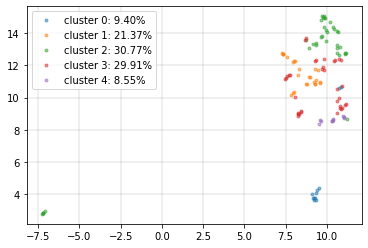

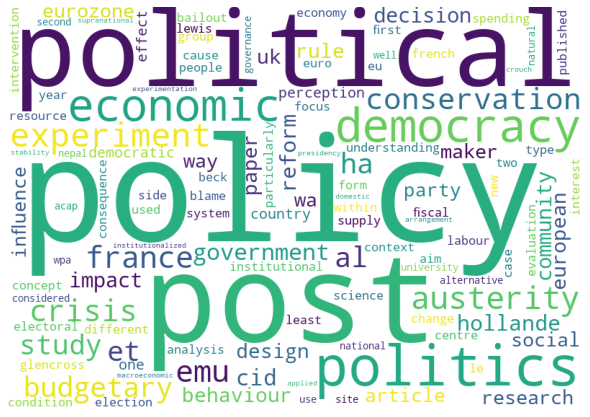

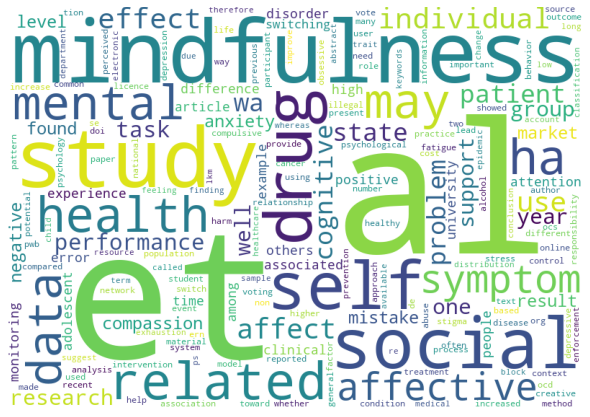

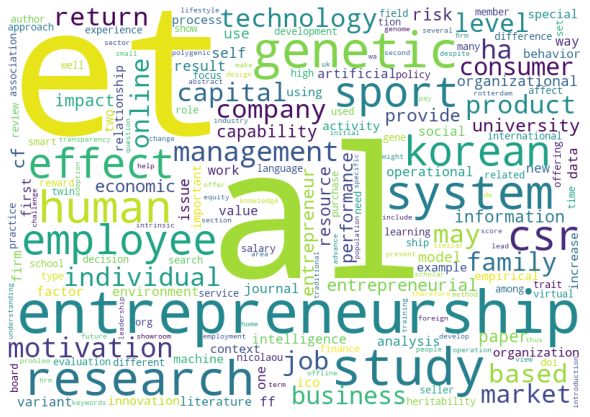

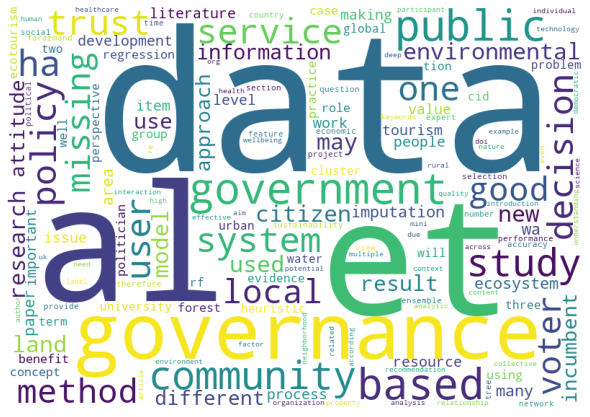

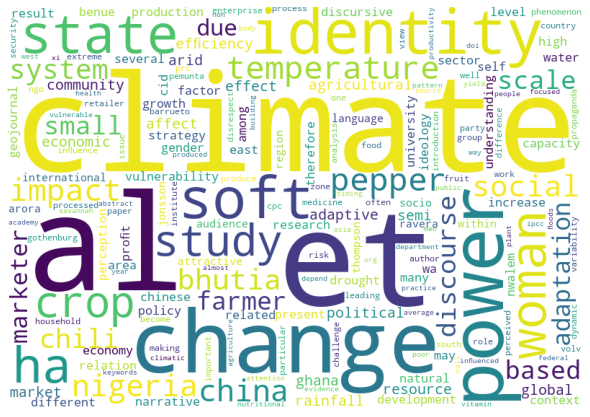

In [0]:
main()

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True